In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
orders = pd.read_csv("orders.csv.zip", sep="|")

In [3]:
orders['time'] = pd.to_datetime(orders['time'])
orders['day_of_week'] = orders['time'].dt.day_of_week
orders['week_of_month'] = (orders['time'].dt.day - 1) // 7 + 1
orders['orderValue'] = orders['order'] * orders['salesPrice']

In [4]:
orders

,time,transactID,itemID,order,salesPrice,day_of_weed,week_of_month,orderValue
0,2018-01-01 00:01:56,2278968,450,1,17.42,0,1,17.42
1,2018-01-01 00:01:56,2278968,83,1,5.19,0,1,5.19
2,2018-01-01 00:07:11,2255797,7851,2,20.47,0,1,40.94
3,2018-01-01 00:09:24,2278968,450,1,17.42,0,1,17.42
4,2018-01-01 00:09:24,2278968,83,1,5.19,0,1,5.19
...,...,...,...,...,...,...,...,...
2181950,2018-06-29 23:54:22,2040347,9217,1,23.50,4,5,23.50
2181951,2018-06-29 23:55:09,2260943,2175,1,11.60,4,5,11.60
2181952,2018-06-29 23:55:09,2260943,2061,1,1.03,4,5,1.03
2181953,2018-06-29 23:55:09,2260943,2195,1,18.73,4,5,18.73


In [5]:
orders['itemID'].value_counts()

itemID
5035    8973
5117    8063
7789    7415
5122    6442
5139    5407
        ... 
5394       1
7530       1
6432       1
8645       1
7176       1
Name: count, Length: 9840, dtype: int64

In [6]:
orders

,time,transactID,itemID,order,salesPrice,day_of_weed,week_of_month,orderValue
0,2018-01-01 00:01:56,2278968,450,1,17.42,0,1,17.42
1,2018-01-01 00:01:56,2278968,83,1,5.19,0,1,5.19
2,2018-01-01 00:07:11,2255797,7851,2,20.47,0,1,40.94
3,2018-01-01 00:09:24,2278968,450,1,17.42,0,1,17.42
4,2018-01-01 00:09:24,2278968,83,1,5.19,0,1,5.19
...,...,...,...,...,...,...,...,...
2181950,2018-06-29 23:54:22,2040347,9217,1,23.50,4,5,23.50
2181951,2018-06-29 23:55:09,2260943,2175,1,11.60,4,5,11.60
2181952,2018-06-29 23:55:09,2260943,2061,1,1.03,4,5,1.03
2181953,2018-06-29 23:55:09,2260943,2195,1,18.73,4,5,18.73


In [7]:
total_orders = orders.groupby([orders['time'].dt.date, orders['itemID']])['order'].sum().unstack(1)
total_values = orders.groupby([orders['time'].dt.date, orders['itemID']])['orderValue'].sum().unstack(1)

In [8]:
orders.groupby([orders['time'].dt.date, orders['itemID']])['orderValue'].sum()

time        itemID
2018-01-01  9            199.84
            11             2.13
            19           155.28
            26          1498.75
            35        164185.98
                        ...    
2018-06-29  10372         99.67
            10392          6.80
            10431       4740.12
            10449       9799.40
            10450         88.96
Name: orderValue, Length: 100148, dtype: float64

In [9]:
total_orders.fillna(0, inplace=True)
total_values.fillna(0, inplace=True)

In [10]:
total_values

itemID,1,2,3,4,5,6,7,8,9,10,...,10440,10441,10442,10443,10449,10450,10459,10460,10462,10463
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,199.84,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2018-01-02,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2018-01-03,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2018-01-04,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2018-01-05,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2018-06-26,3.43,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,48.34,...,1372.60,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2018-06-27,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,44.48,0.0,0.0,0.0,0.0


In [11]:
for k, df in orders.groupby(by='itemID'):
    s1 = df['orderValue'].sum()
    s2 = total_values[k].sum()
    if np.isclose(s1, s2, rtol=1e-9):
        continue
    raise Exception(f"Uneven sums for {k}: {s1} != {s2}")

In [12]:
stuff = pd.DataFrame({
    'total value': total_values.sum(),
    'N. days had sales': (total_values != 0).sum()
})
stuff['average value sell day'] = stuff['total value'] / stuff['N. days had sales']
stuff.corr()

,total value,N. days had sales,average value sell day
total value,1.000000,0.326009,0.483055
N. days had sales,0.326009,1.000000,-0.140865
average value sell day,0.483055,-0.140865,1.000000


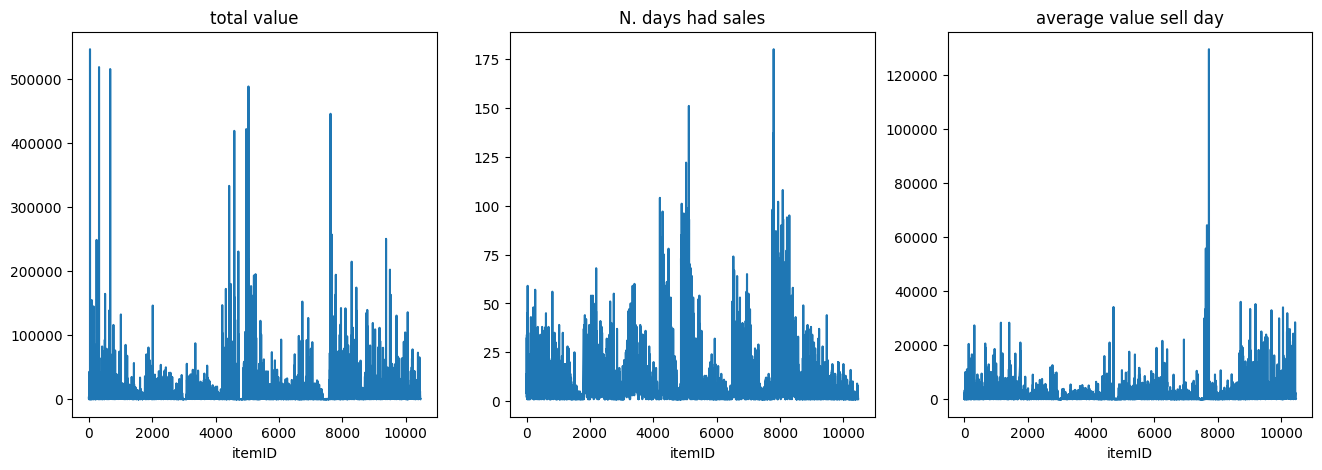

In [13]:
_, axs = plt.subplots(1, 3, figsize=(16, 5))
for a, c in zip(axs, stuff.columns):
    stuff[c].plot(ax=a, title=c) 

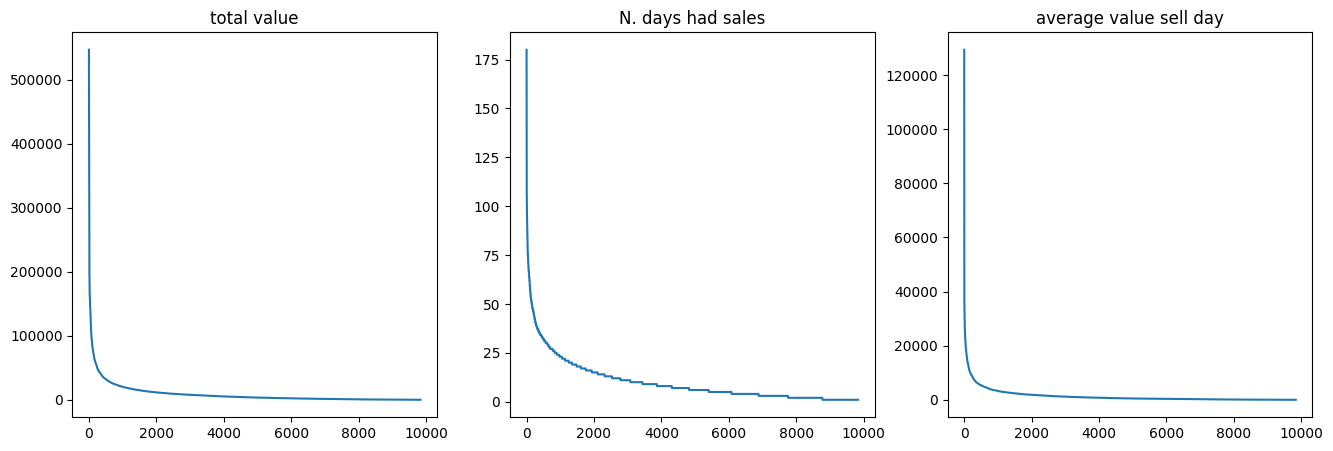

In [14]:
_, axs = plt.subplots(1, 3, figsize=(16, 5))
for a, c in zip(axs, stuff.columns):
    a.plot(stuff[c].sort_values(ascending=False).values)
    a.set_title(c)

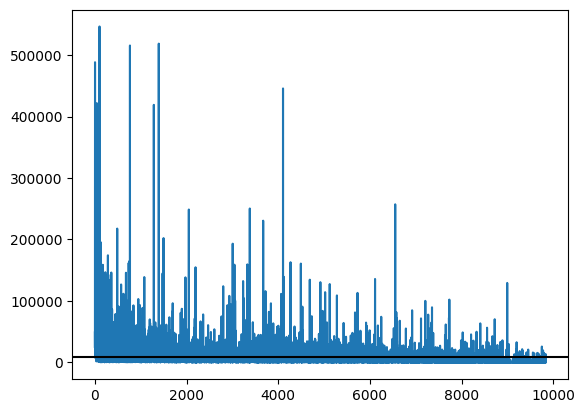

In [15]:
# plt.plot(np.cumsum(stuff['total value'].sort_values().values))
i = stuff['N. days had sales'].sort_values(ascending=False).index
# plt.plot(np.cumsum(stuff['total value'].reindex(i).values))
plt.plot(stuff['total value'].reindex(i).values)
plt.axhline(stuff['total value'].mean(), color='black')

In [16]:
stuff['total value'].max(), stuff['total value'].min()

(np.float64(546429.520000001), np.float64(1.33))

1: 8777
5: 5405
25: 830
50: 152
100: 9


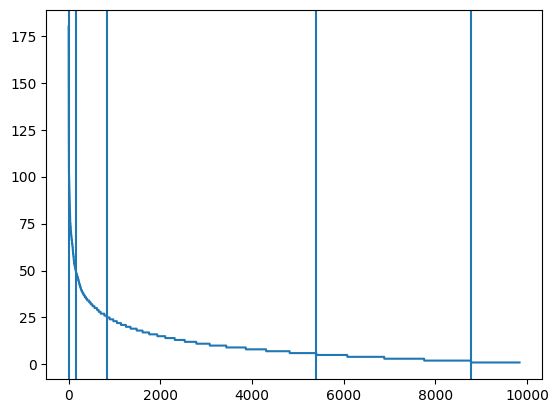

In [17]:
plt.plot(stuff['N. days had sales'].sort_values(ascending=False).values)

# for i in [1, 5] + list(range(10, 180, 10)):
for i in [1, 5, 25, 50, 100]:
    mask = stuff['N. days had sales'].sort_values(ascending=False).values > i
    j = np.argmin(mask)
    print(f"{i}: {mask.sum()}")
    plt.axvline(j)

<Axes: xlabel='time'>

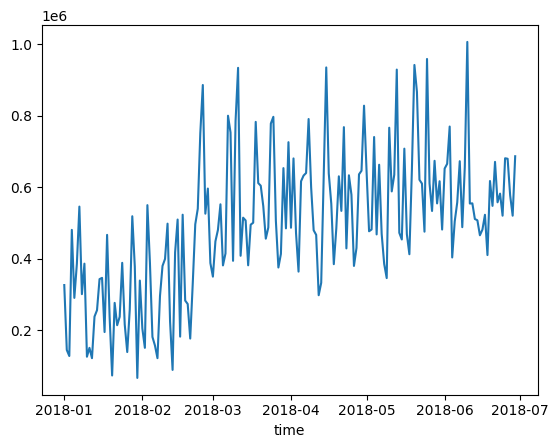

In [18]:
total_values.sum(axis=1).plot()

<Axes: xlabel='time'>

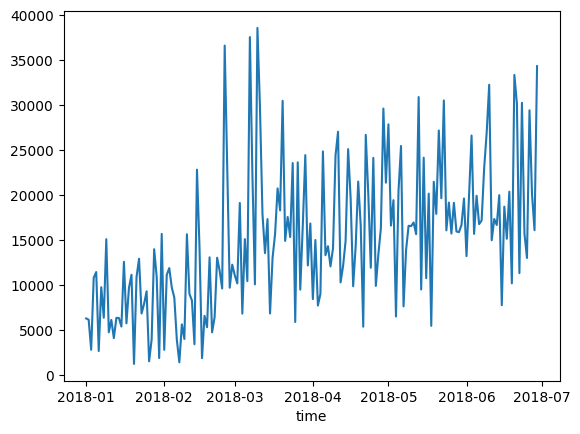

In [19]:
total_orders.sum(axis=1).plot()

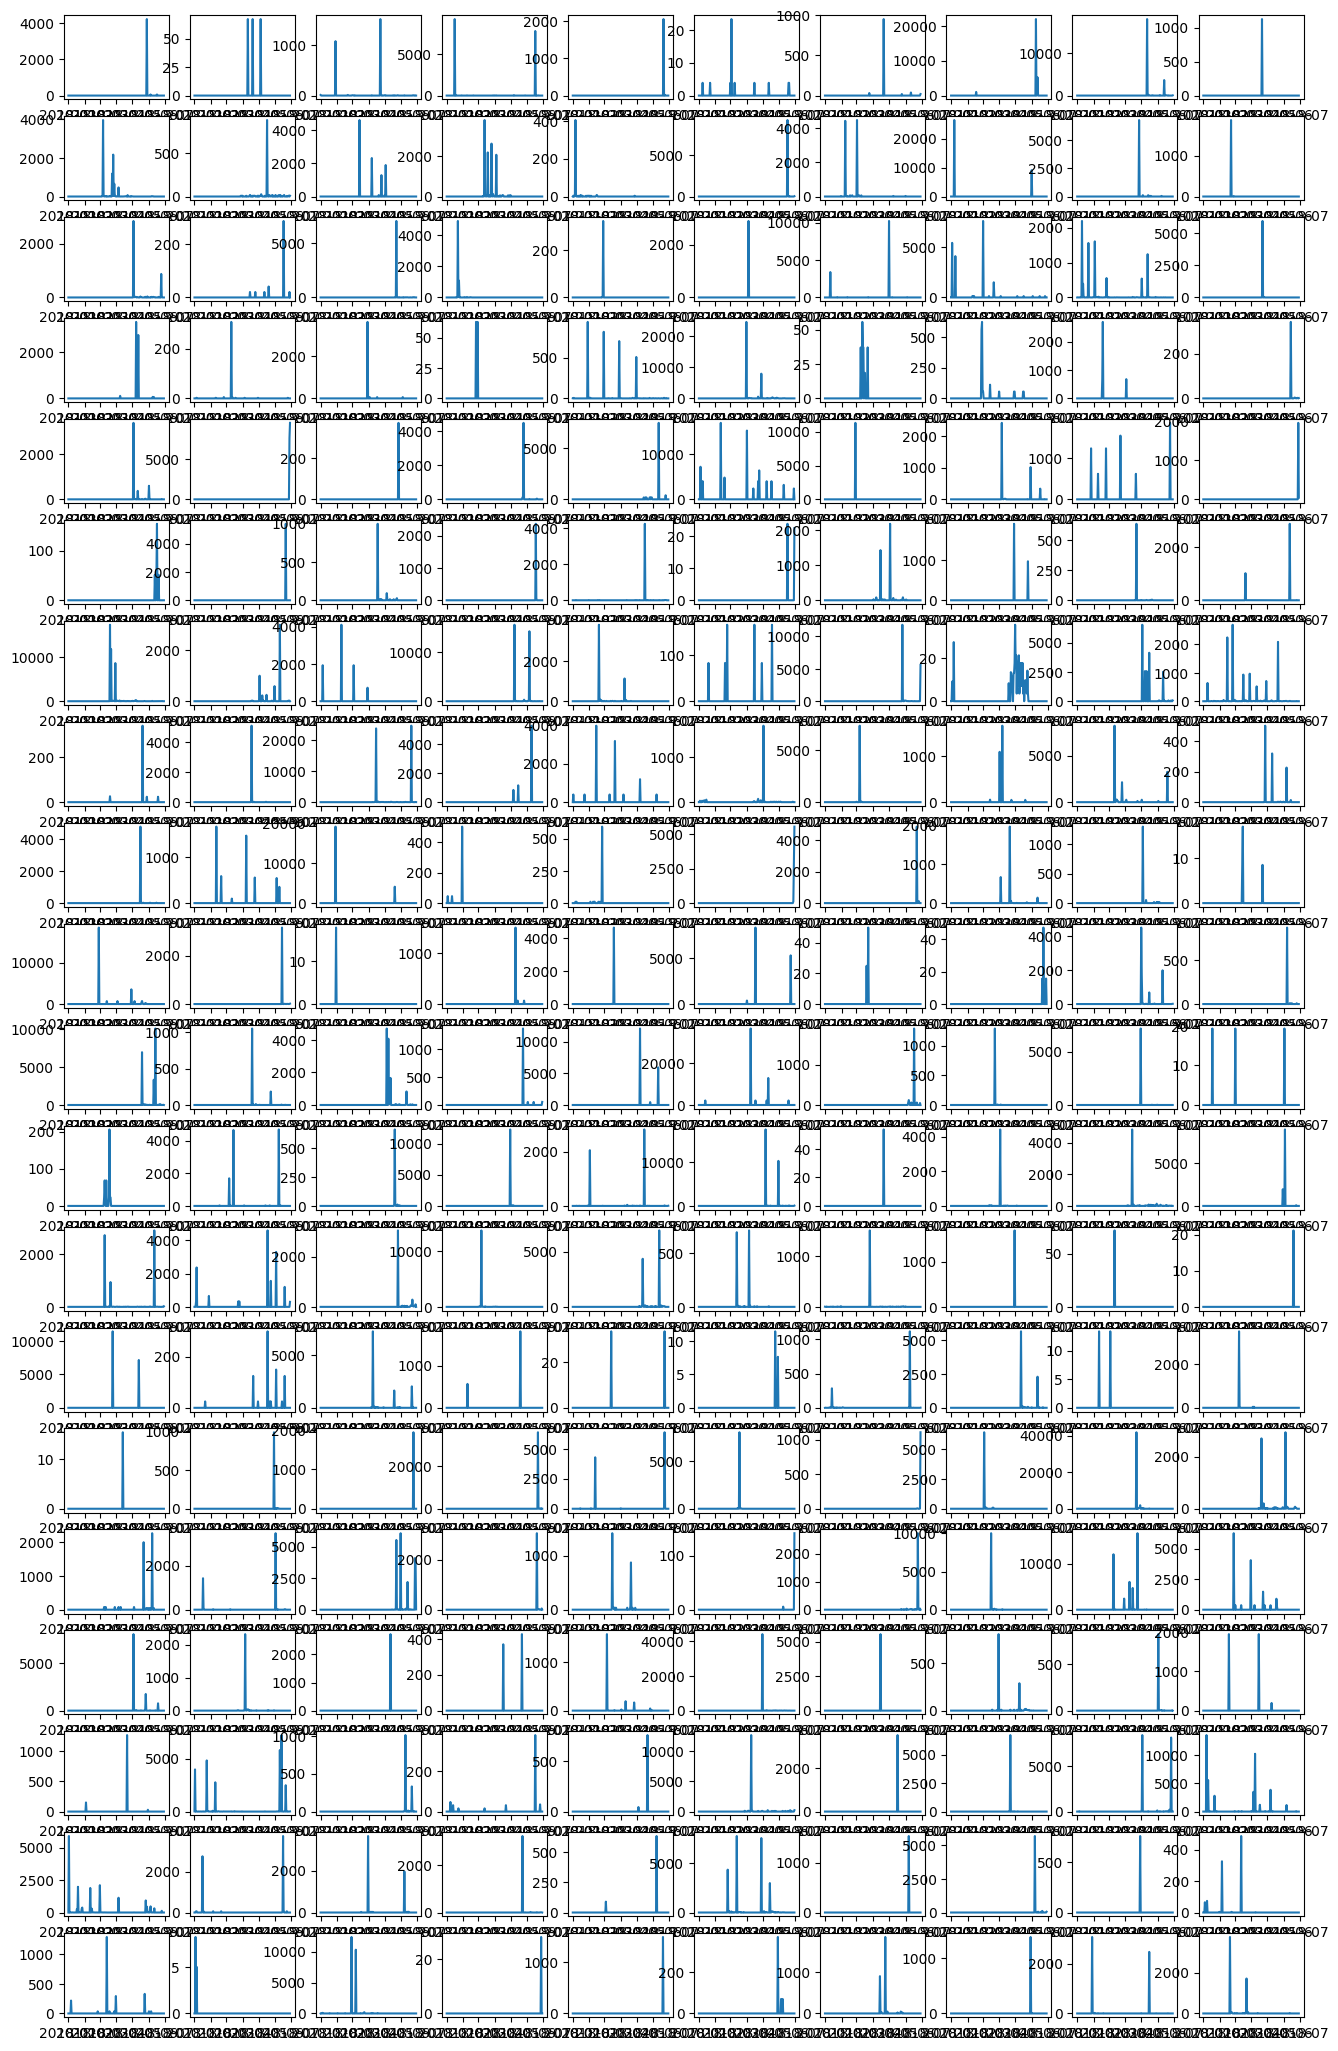

In [20]:
np.random.seed(42)
_, axs = plt.subplots(20, 10, figsize=(16,26))
axs = axs.flatten()
for a, i in zip(axs, np.random.permutation(len(total_values.columns))[:200]):
    c = total_values.columns[i]
    a.plot(total_values[c])

In [22]:
total_values.columns

Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
       ...
       10440, 10441, 10442, 10443, 10449, 10450, 10459, 10460, 10462, 10463],
      dtype='int64', name='itemID', length=9840)

In [28]:
items = pd.read_csv("items.csv", sep="|")

In [109]:
for c in items.columns:
    if 'category' not in c:
        continue
    print(items[c].value_counts())

category1
2    2348
1    1823
8    1734
5    1679
7    1121
4     969
6     489
3     300
Name: count, dtype: int64
category2
44    1348
8     1119
32    1085
1      641
23     623
11     510
5      494
10     462
39     383
24     358
19     329
38     305
28     298
43     252
4      252
6      214
34     181
9      157
21     157
3      134
25      95
30      92
42      86
14      68
40      68
2       64
41      59
18      58
47      58
12      56
22      54
17      54
15      47
13      46
29      45
16      27
26      24
7       24
48      23
45      20
31      18
20      14
46      13
37       9
50       9
49       8
36       7
27       7
35       3
33       2
52       2
51       1
Name: count, dtype: int64
category3
2    2400
1    1823
8    1735
4    1680
6    1018
7     957
3     646
5     204
Name: count, dtype: int64


In [123]:
def plot_merged(items, orders, cat='category3', return_seq=False):
    merged = pd.merge(orders, items, how='inner')
    total_orders_c3 = merged.groupby([merged['time'].dt.date, merged[cat]])['order'].sum().unstack(1)
    d, m = divmod(total_orders_c3.columns.__len__(), 4)
    _, axs = plt.subplots(d + (m != 0), 4, figsize=(17,8))
    axs = axs.flatten()
    for a, c in zip(axs, total_orders_c3.columns):
        a.plot(total_orders_c3[c].values)
    if return_seq:
        return total_orders_c3

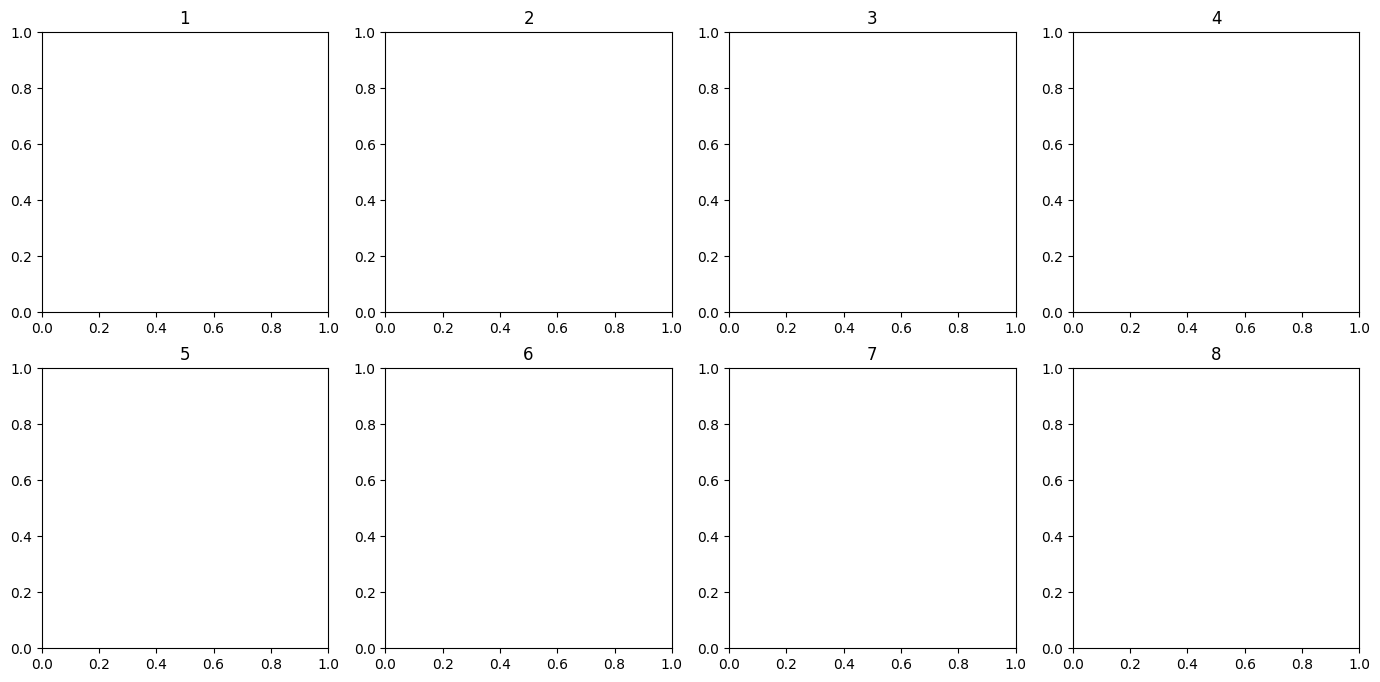

In [124]:
seq = plot_merged(items, orders, 'category1', True)

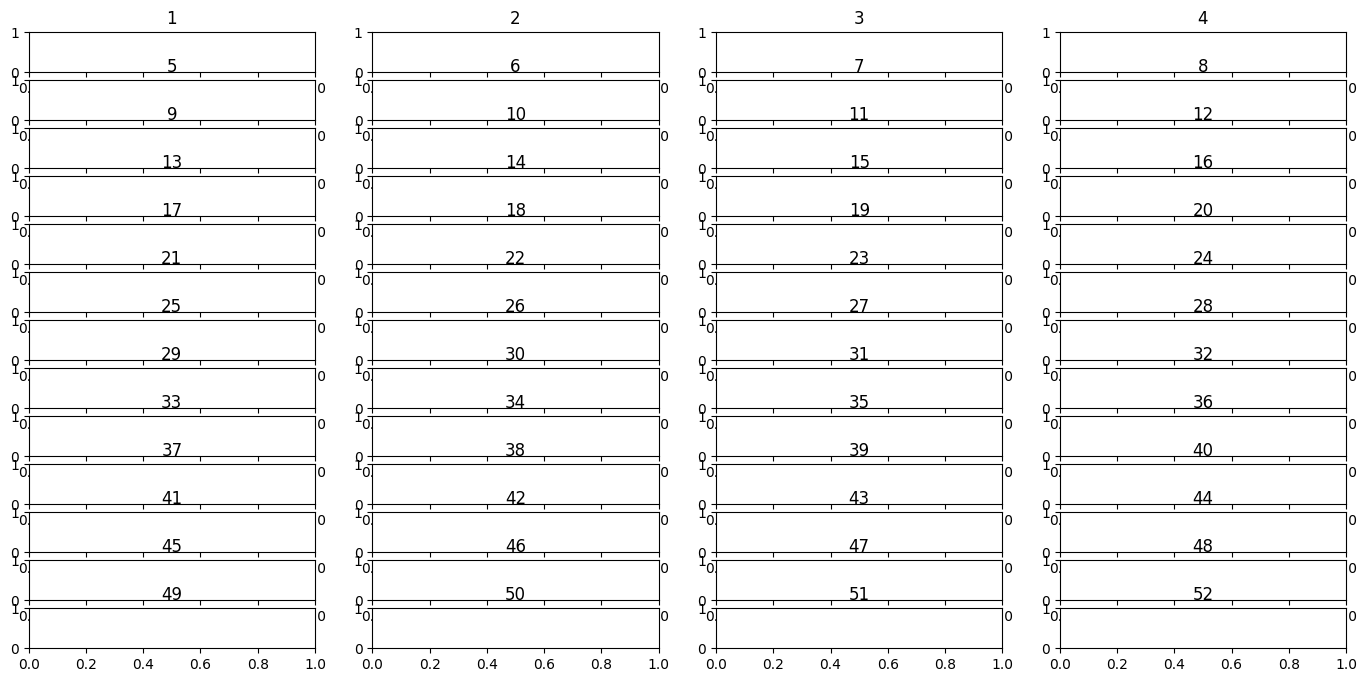

In [125]:
plot_merged(items, orders, cat='category2')

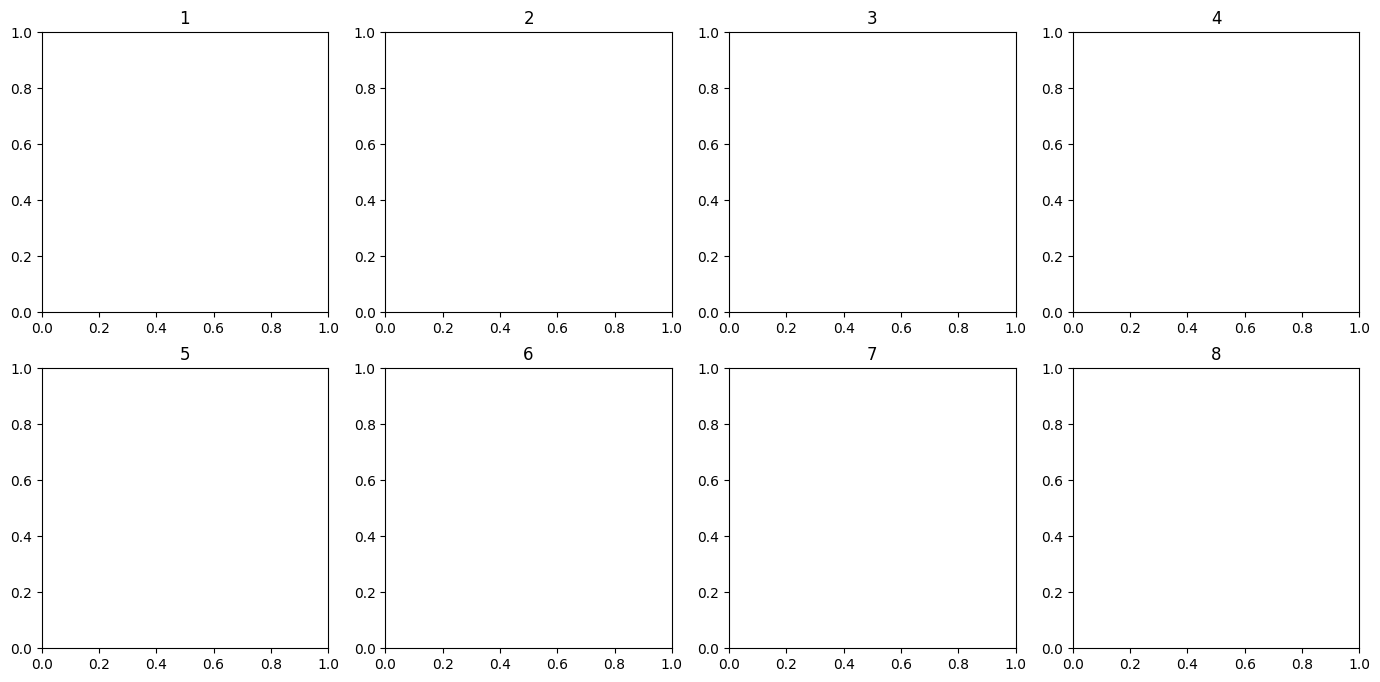

In [126]:
plot_merged(items, orders, 'category3')

# BASIC MODEL

In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [111]:
train, test = seq[1].ffill().diff().dropna()[:150], seq[1].ffill().diff()[150:]

In [115]:
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=14)

c:\Users\dviva\.virtualenvs\case-automated-inventory-management-execut-tVQubp4F\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\dviva\.virtualenvs\case-automated-inventory-management-execut-tVQubp4F\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\dviva\.virtualenvs\case-automated-inventory-management-execut-tVQubp4F\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\dviva\.virtualenvs\case-automated-inventory-management-execut-tVQubp4F\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zer

In [116]:
forecast = model_fit.forecast(steps=14)

<Axes: >

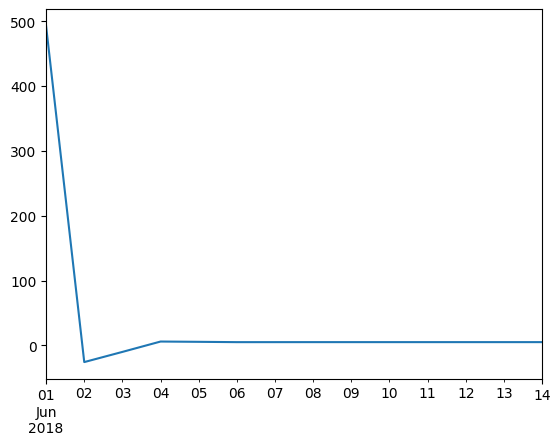

In [117]:
forecast.plot()